In [52]:
from metaflow import Metaflow,Flow,Run,Step

In [53]:
print(Metaflow().flows)

[Flow('CryptoTAFlow'), Flow('CryptoForecastFlow')]


In [67]:
flow = Flow('CryptoForecastFlow')
runs = list(flow)
last_run = runs[0]

In [68]:
list(last_run)

[Step('CryptoForecastFlow/1681852779655536/notify'),
 Step('CryptoForecastFlow/1681852779655536/join'),
 Step('CryptoForecastFlow/1681852779655536/forecast'),
 Step('CryptoForecastFlow/1681852779655536/fetch_data'),
 Step('CryptoForecastFlow/1681852779655536/start')]

In [69]:
step = list(last_run)[0]
step.task.data.name

'CryptoForecastFlow'

In [70]:
step = list(last_run)[0]
step.task.data

<MetaflowData: forecasts, name>

In [72]:
forecasts = step.task.data.forecasts

In [75]:
body = ""
for f in forecasts.keys():
    body = body + f + "\n"
    df = forecasts[f][["ds", "yhat"]].iloc[-12:,:]
    body+= df.to_csv(index=False, header=False, sep="\t", date_format='%-I %p')
    body+= "\n"

body

'bitcoin\n4 AM\t29926.675339734975\n8 AM\t30018.765278831666\n12 PM\t30116.975842187647\n4 PM\t30162.934804110973\n8 PM\t30208.62487639941\n12 AM\t30284.746714318946\n4 AM\t30325.070031189756\n8 AM\t30383.777306543514\n12 PM\t30417.233038519535\n4 PM\t30378.78724715632\n8 PM\t30334.663921184423\n12 AM\t30329.790082006475\n\nethereum\n4 AM\t2103.0246185137294\n8 AM\t2111.636985943119\n12 PM\t2123.4373423218085\n4 PM\t2135.142256529367\n8 PM\t2144.4114308115745\n12 AM\t2153.5164315268858\n4 AM\t2165.8638142198506\n8 AM\t2173.088383245062\n12 PM\t2180.430404520264\n4 PM\t2185.7532922195664\n8 PM\t2188.1809169239477\n12 AM\t2191.4846160233196\n\nsolana\n4 AM\t24.83776229475777\n8 AM\t25.055327335030945\n12 PM\t25.21908425182208\n4 PM\t25.425874097691235\n8 PM\t25.513043150054266\n12 AM\t25.640688698389607\n4 AM\t25.774966233651238\n8 AM\t25.971927625774935\n12 PM\t26.058967659306003\n4 PM\t26.14659853622167\n8 PM\t26.091943381169617\n12 AM\t26.077344463556276\n\n'

In [46]:
def get_predictions(coin='bitcoin', days=30, pred_periods=6):
    from pycoingecko import CoinGeckoAPI
    import pandas as pd
    from prophet import Prophet

    cg = CoinGeckoAPI()

    data = cg.get_coin_ohlc_by_id(id=coin, vs_currency="usd", days=days)

    cols= ["ds", "Open", "High", "Low", "y"]
    df = pd.DataFrame(data, columns=cols)  
    df = df[["ds", "y"]] 
    df['ds'] = pd.to_datetime(df['ds'], unit='ms')    

    m = Prophet()
    m.fit(df)

    future = m.make_future_dataframe(periods=pred_periods, freq='4H')
    fcst = m.predict(future)

    fig = m.plot(fcst)

    return fcst

00:21:30 - cmdstanpy - INFO - Chain [1] start processing
00:21:30 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-19 20:00:00,4.248485,3.997968,4.601707,4.248485,4.248485,0.073113,0.073113,0.073113,0.017237,0.017237,0.017237,0.055876,0.055876,0.055876,0.0,0.0,0.0,4.321598
1,2023-03-20 00:00:00,4.243144,4.099922,4.698280,4.243144,4.243144,0.132415,0.132415,0.132415,0.048536,0.048536,0.048536,0.083879,0.083879,0.083879,0.0,0.0,0.0,4.375559
2,2023-03-20 04:00:00,4.237802,4.049974,4.649831,4.237802,4.237802,0.107297,0.107297,0.107297,0.012342,0.012342,0.012342,0.094955,0.094955,0.094955,0.0,0.0,0.0,4.345100
3,2023-03-20 08:00:00,4.232461,4.010705,4.588710,4.232461,4.232461,0.077304,0.077304,0.077304,-0.010302,-0.010302,-0.010302,0.087606,0.087606,0.087606,0.0,0.0,0.0,4.309765
4,2023-03-20 12:00:00,4.227120,3.922537,4.525489,4.227120,4.227120,0.004705,0.004705,0.004705,-0.059305,-0.059305,-0.059305,0.064010,0.064010,0.064010,0.0,0.0,0.0,4.231825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2023-04-20 04:00:00,10.217523,9.827319,10.442638,10.184623,10.252551,-0.085887,-0.085887,-0.085887,0.012342,0.012342,0.012342,-0.098229,-0.098229,-0.098229,0.0,0.0,0.0,10.131636
189,2023-04-20 08:00:00,10.295482,9.856109,10.486280,10.254579,10.337345,-0.129370,-0.129370,-0.129370,-0.010302,-0.010302,-0.010302,-0.119067,-0.119067,-0.119067,0.0,0.0,0.0,10.166112
190,2023-04-20 12:00:00,10.373441,9.877827,10.496409,10.322813,10.423365,-0.181667,-0.181667,-0.181667,-0.059305,-0.059305,-0.059305,-0.122362,-0.122362,-0.122362,0.0,0.0,0.0,10.191774
191,2023-04-20 16:00:00,10.451400,10.022592,10.633797,10.392975,10.511077,-0.113818,-0.113818,-0.113818,-0.008508,-0.008508,-0.008508,-0.105310,-0.105310,-0.105310,0.0,0.0,0.0,10.337583


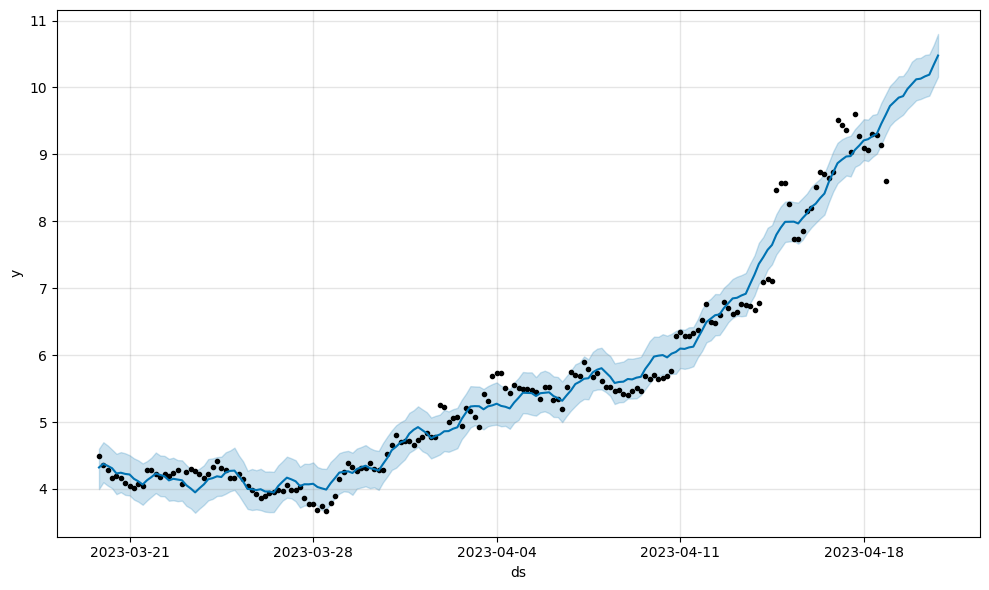

In [47]:
get_predictions(coin='injective-protocol', days=30, pred_periods=12)

00:21:57 - cmdstanpy - INFO - Chain [1] start processing
00:21:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-19 20:00:00,0.141810,0.131337,0.146946,0.141810,0.141810,-0.002741,-0.002741,-0.002741,0.000656,0.000656,0.000656,-0.003397,-0.003397,-0.003397,0.0,0.0,0.0,0.139069
1,2023-03-20 00:00:00,0.141564,0.130536,0.146098,0.141564,0.141564,-0.003173,-0.003173,-0.003173,-0.000256,-0.000256,-0.000256,-0.002917,-0.002917,-0.002917,0.0,0.0,0.0,0.138392
2,2023-03-20 04:00:00,0.141319,0.131047,0.146139,0.141319,0.141319,-0.002359,-0.002359,-0.002359,0.000201,0.000201,0.000201,-0.002561,-0.002561,-0.002561,0.0,0.0,0.0,0.138960
3,2023-03-20 08:00:00,0.141074,0.131537,0.146794,0.141074,0.141074,-0.002011,-0.002011,-0.002011,0.000240,0.000240,0.000240,-0.002251,-0.002251,-0.002251,0.0,0.0,0.0,0.139063
4,2023-03-20 12:00:00,0.140829,0.130980,0.145898,0.140829,0.140829,-0.002335,-0.002335,-0.002335,-0.000448,-0.000448,-0.000448,-0.001887,-0.001887,-0.001887,0.0,0.0,0.0,0.138494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2023-04-20 04:00:00,0.204459,0.200201,0.214501,0.203933,0.204936,0.002712,0.002712,0.002712,0.000201,0.000201,0.000201,0.002511,0.002511,0.002511,0.0,0.0,0.0,0.207172
189,2023-04-20 08:00:00,0.206049,0.200546,0.215975,0.205398,0.206653,0.002398,0.002398,0.002398,0.000240,0.000240,0.000240,0.002159,0.002159,0.002159,0.0,0.0,0.0,0.208447
190,2023-04-20 12:00:00,0.207638,0.201618,0.217124,0.206845,0.208367,0.001625,0.001625,0.001625,-0.000448,-0.000448,-0.000448,0.002073,0.002073,0.002073,0.0,0.0,0.0,0.209264
191,2023-04-20 16:00:00,0.209228,0.203438,0.219011,0.208279,0.210118,0.001793,0.001793,0.001793,-0.000393,-0.000393,-0.000393,0.002186,0.002186,0.002186,0.0,0.0,0.0,0.211021


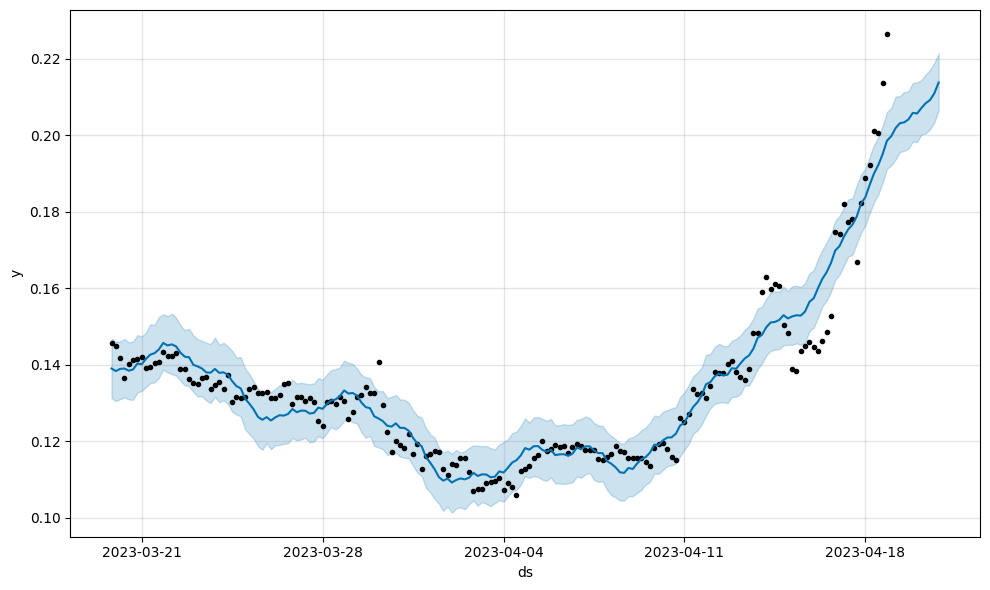

In [48]:
get_predictions(coin='media-licensing-token', days=30, pred_periods=12)

00:22:32 - cmdstanpy - INFO - Chain [1] start processing
00:22:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-19 20:00:00,1816.457501,1775.524705,1846.638622,1816.457501,1816.457501,-6.018665,-6.018665,-6.018665,-0.796060,-0.796060,-0.796060,-5.222605,-5.222605,-5.222605,0.0,0.0,0.0,1810.438836
1,2023-03-20 00:00:00,1814.714839,1770.511721,1836.261187,1814.714839,1814.714839,-11.045427,-11.045427,-11.045427,-0.805077,-0.805077,-0.805077,-10.240350,-10.240350,-10.240350,0.0,0.0,0.0,1803.669411
2,2023-03-20 04:00:00,1812.972176,1760.539823,1834.167456,1812.972176,1812.972176,-16.044581,-16.044581,-16.044581,0.206286,0.206286,0.206286,-16.250867,-16.250867,-16.250867,0.0,0.0,0.0,1796.927595
3,2023-03-20 08:00:00,1811.229513,1752.480766,1823.475843,1811.229513,1811.229513,-22.963500,-22.963500,-22.963500,-0.302654,-0.302654,-0.302654,-22.660846,-22.660846,-22.660846,0.0,0.0,0.0,1788.266013
4,2023-03-20 12:00:00,1809.486850,1747.132827,1817.544736,1809.486850,1809.486850,-27.911293,-27.911293,-27.911293,0.773529,0.773529,0.773529,-28.684822,-28.684822,-28.684822,0.0,0.0,0.0,1781.575557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2023-04-20 04:00:00,2208.395690,2173.120258,2242.673597,2205.204388,2211.665982,-2.295391,-2.295391,-2.295391,0.206286,0.206286,0.206286,-2.501677,-2.501677,-2.501677,0.0,0.0,0.0,2206.100298
189,2023-04-20 08:00:00,2214.009420,2176.765172,2247.307173,2210.105245,2218.116191,-1.306151,-1.306151,-1.306151,-0.302654,-0.302654,-0.302654,-1.003497,-1.003497,-1.003497,0.0,0.0,0.0,2212.703268
190,2023-04-20 12:00:00,2219.623150,2187.723648,2257.621545,2214.750658,2224.495554,3.114700,3.114700,3.114700,0.773529,0.773529,0.773529,2.341172,2.341172,2.341172,0.0,0.0,0.0,2222.737850
191,2023-04-20 16:00:00,2225.236880,2198.613478,2270.988599,2219.597569,2231.022306,8.304464,8.304464,8.304464,0.923977,0.923977,0.923977,7.380488,7.380488,7.380488,0.0,0.0,0.0,2233.541344


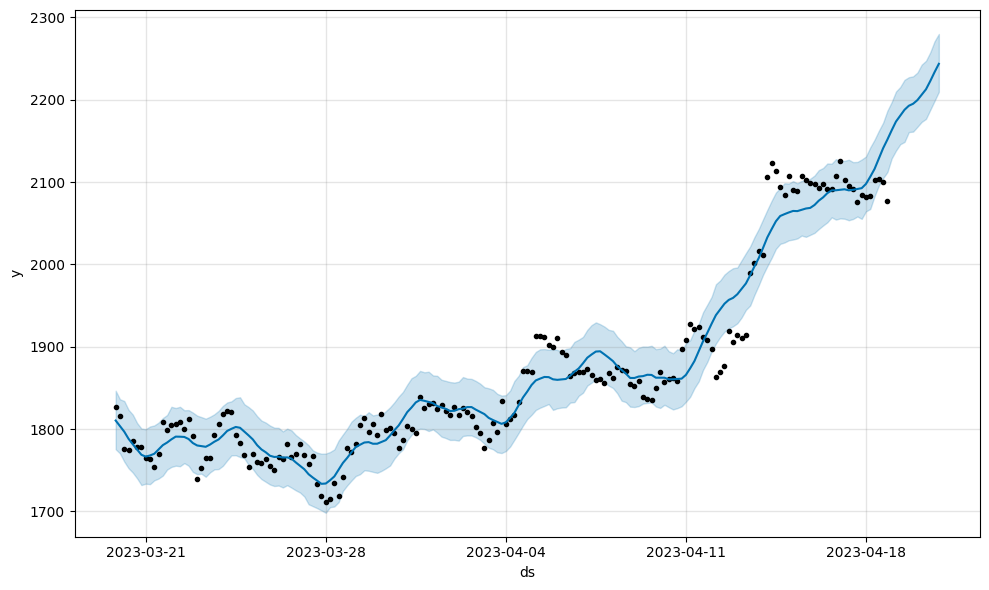

In [49]:
get_predictions(coin='ethereum', days=30, pred_periods=12)

In [51]:
fcst[["yhat", ]].tail(6)

187    10.122340
188    10.131636
189    10.166112
190    10.191774
191    10.337583
192    10.477684
Name: yhat, dtype: float64